In [44]:
import os
import sys
import json
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
random.seed(1408)
import csv
import collections
# Load options
import pandas as pd
import glob
from random import sample
from sim_data.sumstats import *
# Set data path (CLI?)
data_path = 'sim_data/'
params = {'lengthscale':-10.95518256,
        'gp_sigma':5.62844507,
        'p_fw':0.56139752,
        'exo_left':  15.24284578,
        'exo_right':18.89962825,
        'ber_prob': 0.51447639,
        'fw_br' : 0.5,
        'rc_br': 0.5,
        'gp_offset': -10.0,
        "gp_ridge" : .04}
# Load df with all seqs
df = pd.read_pickle("sim_data/data/full_edge_df.pk1")

In [45]:
df

,Unnamed: 0,sample_id,family,orig_seq,mut_seq,branch_length,v_call,v_int_start,v_int_end,v_start_pos,v_diff
0,0,316188,1810,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,9.965000e-07,IGHV4,65,293,65,0
1,1,316188,1810,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,9.965000e-07,IGHV4,65,293,65,0
2,2,316188,1810,CGCTGTCTCTGGTTATTCCATCAGCAGTGGTTACTTCTGGGCCTGG...,CGCTGTCTCTGGTTATTCCATCAGTAGTGTTTACTTCTGGGCCTGG...,6.856857e-03,IGHV4,65,293,65,0
3,3,316188,1810,CGCTGTCTCTGGTTATTCCATCAGCAGTGGTTACTTCTGGGCCTGG...,CGCTGTCTCTGGTTATTCCATCATCAGTGGTTACTTCTGGGCCTGG...,1.378499e-02,IGHV4,65,293,65,0
4,4,316188,1810,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCGG...,9.965000e-07,IGHV4,65,293,65,0
...,...,...,...,...,...,...,...,...,...,...,...
84317,84317,326713,7218,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTAGTTCAGCCTGGGG...,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTAGTTCAGCCTGGGG...,1.008400e-06,IGHV3,65,294,63,0
84318,84318,326713,7218,TGTGCAGCGTCTGGATTCACCTTCAGTAACTACTGGATGCACTGGG...,TGTGCAGCGTCTGGATTCACCTTCAGTAACTACTGGATGCACTGGG...,3.446953e-03,IGHV3,65,294,63,0
84319,84319,326713,7218,TGTGCAGCGTCTGGATTCACCTTCAGTAACTACTGGATGCACTGGG...,TGTGCAGCGTCTGGATTCACCTTCAGCAACTACTGGATGCACTGGG...,6.921136e-03,IGHV3,65,294,63,0
84320,84320,326713,7218,TGTGCAGCGTCTGGATTCACCTTCAGTAACTACTGGATGCACTGGG...,TGTGCAGCGTCTGGATTCACCTTCAGTAACTACTGGATGCACTGGG...,6.907990e-03,IGHV3,65,294,63,0


In [46]:
parent_sample = list(df['orig_seq'])
obs_sample = list(df['mut_seq'])

colocals = colocal_vector(parent_sample, obs_sample)
exo = np.concatenate([get_exo_summ(obs_sample[i],parent_sample[i]) for i in range(len(parent_sample))]).ravel().tolist()
at = np.concatenate([get_pairwise_at(obs_sample[i],parent_sample[i]) for i in range(len(parent_sample))]).ravel().tolist()
c_counts, g_counts = get_cg_summ_sample(obs_sample,parent_sample)
bp = base_prob(obs_sample,parent_sample)
atp = at_frac(obs_sample,parent_sample)
summ_stat = np.append(colocals,[np.mean(exo),np.mean(at), np.sum(c_counts)/(np.sum(c_counts) + np.sum(g_counts)), bp,atp])

In [47]:
summ_stat

array([8.01409529e+00, 5.43228223e+00, 3.82878299e+00, 2.87256411e+00,
       3.06274371e+00, 3.15260916e+00, 2.67119703e+00, 2.14907171e+00,
       2.41667179e+00, 2.19813561e+00, 2.42758014e+00, 2.26397349e+00,
       1.91828723e+00, 1.81848738e+00, 1.86772120e+00, 1.71127614e+00,
       1.61961454e+00, 1.49847368e+00, 1.46175463e+00, 1.49111149e+00,
       1.52545439e+00, 1.45376393e+00, 1.26070240e+00, 1.26381310e+00,
       1.46384110e+00, 1.25713362e+00, 1.22478949e+00, 1.18799163e+00,
       1.06906044e+00, 1.09995190e+00, 1.12080032e+00, 1.07561308e+00,
       1.13839924e+00, 9.33814176e-01, 9.79587304e-01, 9.87411286e-01,
       9.58199798e-01, 9.96741268e-01, 9.53029210e-01, 9.50969106e-01,
       8.56006029e-01, 9.35836184e-01, 8.39160658e-01, 8.56398197e-01,
       9.40596578e-01, 1.01688640e+00, 8.14438689e-01, 8.23143534e-01,
       9.62779956e-01, 8.84555047e-01, 9.01925394e-01, 8.97732238e-01,
       9.61127870e-01, 9.95167947e-01, 8.77789624e-01, 1.01111575e+00,
      

In [9]:
real_vals = np.array([-9.71396504,  6.9732454 ,  0.51655939, 18.22189314, 14.75165542,
        0.657664  ])

In [24]:
# Load our stuff
import numpy as np
from Bio import SeqIO
from SHMModels.simulate_mutations import *
from SHMModels.fitted_models import ContextModel
import pkgutil
import logging
import os
import sys
import json
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
import csv
import collections
from scipy.stats import norm
# Load options
import pandas as pd
import glob
from random import sample
from sim_data.sumstats import *
from sim_data.params import *
import sys
# Load df with all seqs
true_model_params = {           "lengthscale" : -9.71396504,
                       "gp_sigma" : 6.9732454,
                       "gp_ridge" : .04,
            "gp_offset": -10,
            "p_fw": 0.51655939,
            "fw_br": 0.5,
            "rc_br": 0.5,
            "exo_left": 18.22189314,
            "exo_right": 14.75165542,
            "ber_prob": 0.657664
            }
parent_sequences = list(df['orig_seq'])
cm = ContextModel(3, 2, pkgutil.get_data("SHMModels", "data/aid_goodman.csv"))
# Get batch (BER AND POL ETA DEFINED HERE)
def gen_batch_letters(seq,batch_size, params):
       # The prior specification
    ber_prob = params['ber_prob']
    ber_params = [0.25,0.25,0.25,0.25]
    
    bubble_size = 25.0
    pol_eta_params = {
        "A": [0.9, 0.02, 0.02, 0.06],
        "G": [0.01, 0.97, 0.01, 0.01],
        "C": [0.01, 0.01, 0.97, 0.01],
        "T": [0.06, 0.02, 0.02, 0.9],
    }
    prior_params = params
    exo_left = 1.0/prior_params['exo_left']
    exo_right = 1.0/prior_params['exo_right']
    mutated_seq_list = []
    for i in range(batch_size):
          mr = MutationRound(
          seq,
          ber_lambda=1.0,
          mmr_lambda=(1 - ber_prob)/ber_prob,
          replication_time=100,
          bubble_size=bubble_size,
          aid_time=10,
          exo_params={"left": exo_left, "right": exo_right},
          pol_eta_params=pol_eta_params,
          ber_params=ber_params,
          p_fw= prior_params['p_fw'],
          aid_context_model=cm,
          log_ls = prior_params['lengthscale'],
          sg = prior_params['gp_sigma'],
          fw_br = prior_params['fw_br'],
          rc_br = prior_params['rc_br'],
          off = prior_params['gp_offset']
          )
          mr.mutation_round()
          mutated_seq_list.append(SeqRecord(mr.repaired_sequence, id=""))
    return [list(i.seq) for i in mutated_seq_list]


num_seqs = 10000



In [54]:
obs_sample = []
orig_sample = []
parent_sample = random.sample(parent_sequences,50000)
for i in range(num_seqs):
    t_seq = gen_batch_letters(Seq(parent_sample[i]),1, true_model_params)
    t_str = "".join([str(i) for i in t_seq[0]])
    obs_sample.append(t_str)
    orig_sample.append(parent_sample[i])

In [55]:
ppc_stats = np.zeros((100,105))
inds = np.random.randint(0,10000, size = (100,5000))

In [56]:
for i in range(100):
    t_orig = [orig_sample[j] for j in inds[i,:]]
    t_mut= [obs_sample[j] for j in inds[i,:]]
    colocals = colocal_vector(t_orig, t_mut)
    exo = np.concatenate([get_exo_summ(t_mut[i],t_orig[i]) for i in range(len(t_orig))]).ravel().tolist()
    at = np.concatenate([get_pairwise_at(t_orig[i],t_mut[i]) for i in range(len(t_orig))]).ravel().tolist()
    c_counts, g_counts = get_cg_summ_sample(t_mut,t_orig)
    bp = base_prob(t_mut,t_orig)
    atp = at_frac(t_mut,t_orig)
    summ_stat = np.append(colocals,[np.mean(exo),np.mean(at), np.sum(c_counts)/(np.sum(c_counts) + np.sum(g_counts)), bp,atp])
    ppc_stats[i,:] = summ_stat
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [59]:
lower = np.zeros(100)
upper = np.zeros(100)

for i in range(100):
    lower[i] = np.quantile(ppc_stats[:,i],0.01)
    upper[i] = np.quantile(ppc_stats[:,i],0.99)

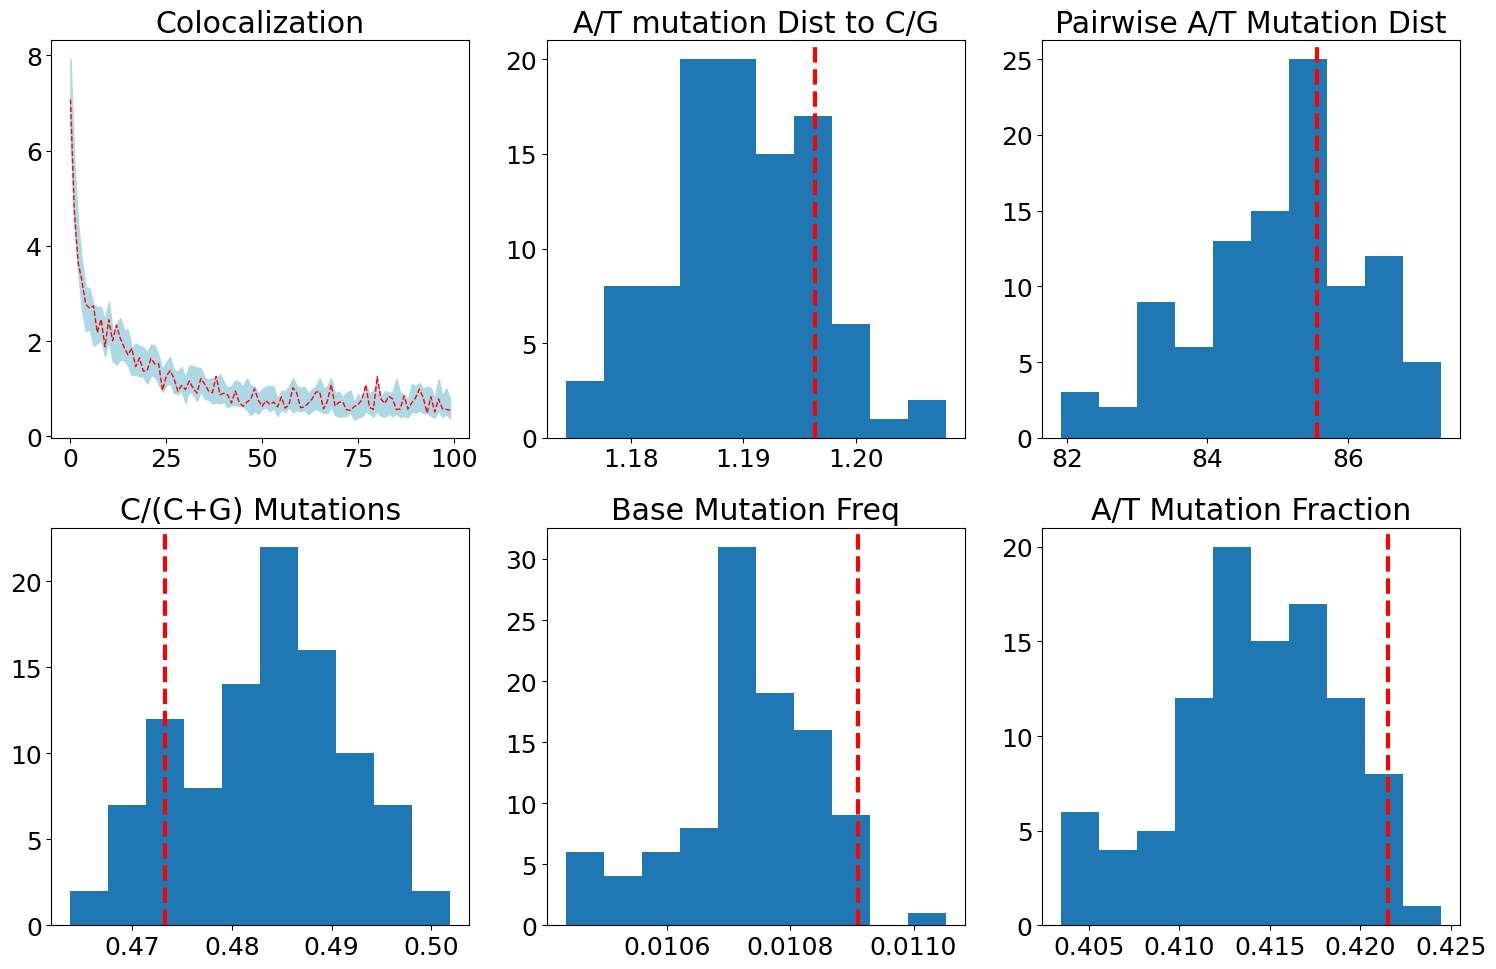

In [60]:
plt.rcParams.update({'font.size': 18})
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3)
  
# For Sine Function
axis[0, 0].fill_between(range(100),lower,upper, color = 'lightblue')
axis[0,0].plot(summ_stat[0:100], color='red', linestyle='dashed', linewidth=1)
axis[0, 0].set_title("Colocalization")
  
# For Cosine Function
axis[0, 1].hist(ppc_stats[:,100])
axis[0, 1].axvline(summ_stat[100], color='red', linestyle='dashed', linewidth=3)
axis[0, 1].set_title("A/T mutation Dist to C/G")

# For Cosine Function
axis[0, 2].hist(ppc_stats[:,101])
axis[0, 2].axvline(summ_stat[101], color='red', linestyle='dashed', linewidth=3)
axis[0, 2].set_title("Pairwise A/T Mutation Dist")
# For Cosine Function
axis[1, 0].hist(ppc_stats[:,102])
axis[1, 0].axvline(summ_stat[102], color='red', linestyle='dashed', linewidth=3)
axis[1, 0].set_title("C/(C+G) Mutations")
# For Cosine Function
axis[1, 1].hist(ppc_stats[:,103])
axis[1, 1].axvline(summ_stat[103], color='red', linestyle='dashed', linewidth=3)
axis[1, 1].set_title("Base Mutation Freq")
# For Cosine Function
axis[1, 2].hist(ppc_stats[:,104])
axis[1, 2].axvline(summ_stat[104], color='red', linestyle='dashed', linewidth=3)
axis[1, 2].set_title("A/T Mutation Fraction")
figure.set_figheight(10)
figure.set_figwidth(15)
figure.tight_layout(pad=1.0)
# Combine all the operations and display
plt.savefig('figures/ppc.png')
plt.show()